#**Assignment 15. Random Forest - 01
**Dataset: Company_Data.csv**

In [1]:
# importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# Loading Dataset
data = pd.read_csv('/content/Company_Data.csv')

#**EDA & Data Preprocessing**

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.sample(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
382,4.95,121,28,19,315,121,Medium,66,14,Yes,Yes
105,5.55,104,100,8,398,97,Medium,61,11,Yes,Yes
59,5.21,118,71,4,148,114,Medium,80,13,Yes,No
200,5.56,144,92,0,349,146,Medium,62,12,No,No
227,8.69,113,64,10,68,101,Medium,57,16,Yes,Yes
181,7.43,121,83,0,79,91,Medium,68,11,Yes,No
245,10.00,114,43,0,199,88,Good,57,10,No,Yes
292,11.82,113,66,16,322,74,Good,76,15,Yes,Yes
57,0.91,93,91,0,22,117,Bad,75,11,Yes,No
274,7.22,135,93,2,67,119,Medium,34,11,Yes,Yes


In [5]:
data.info()	

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


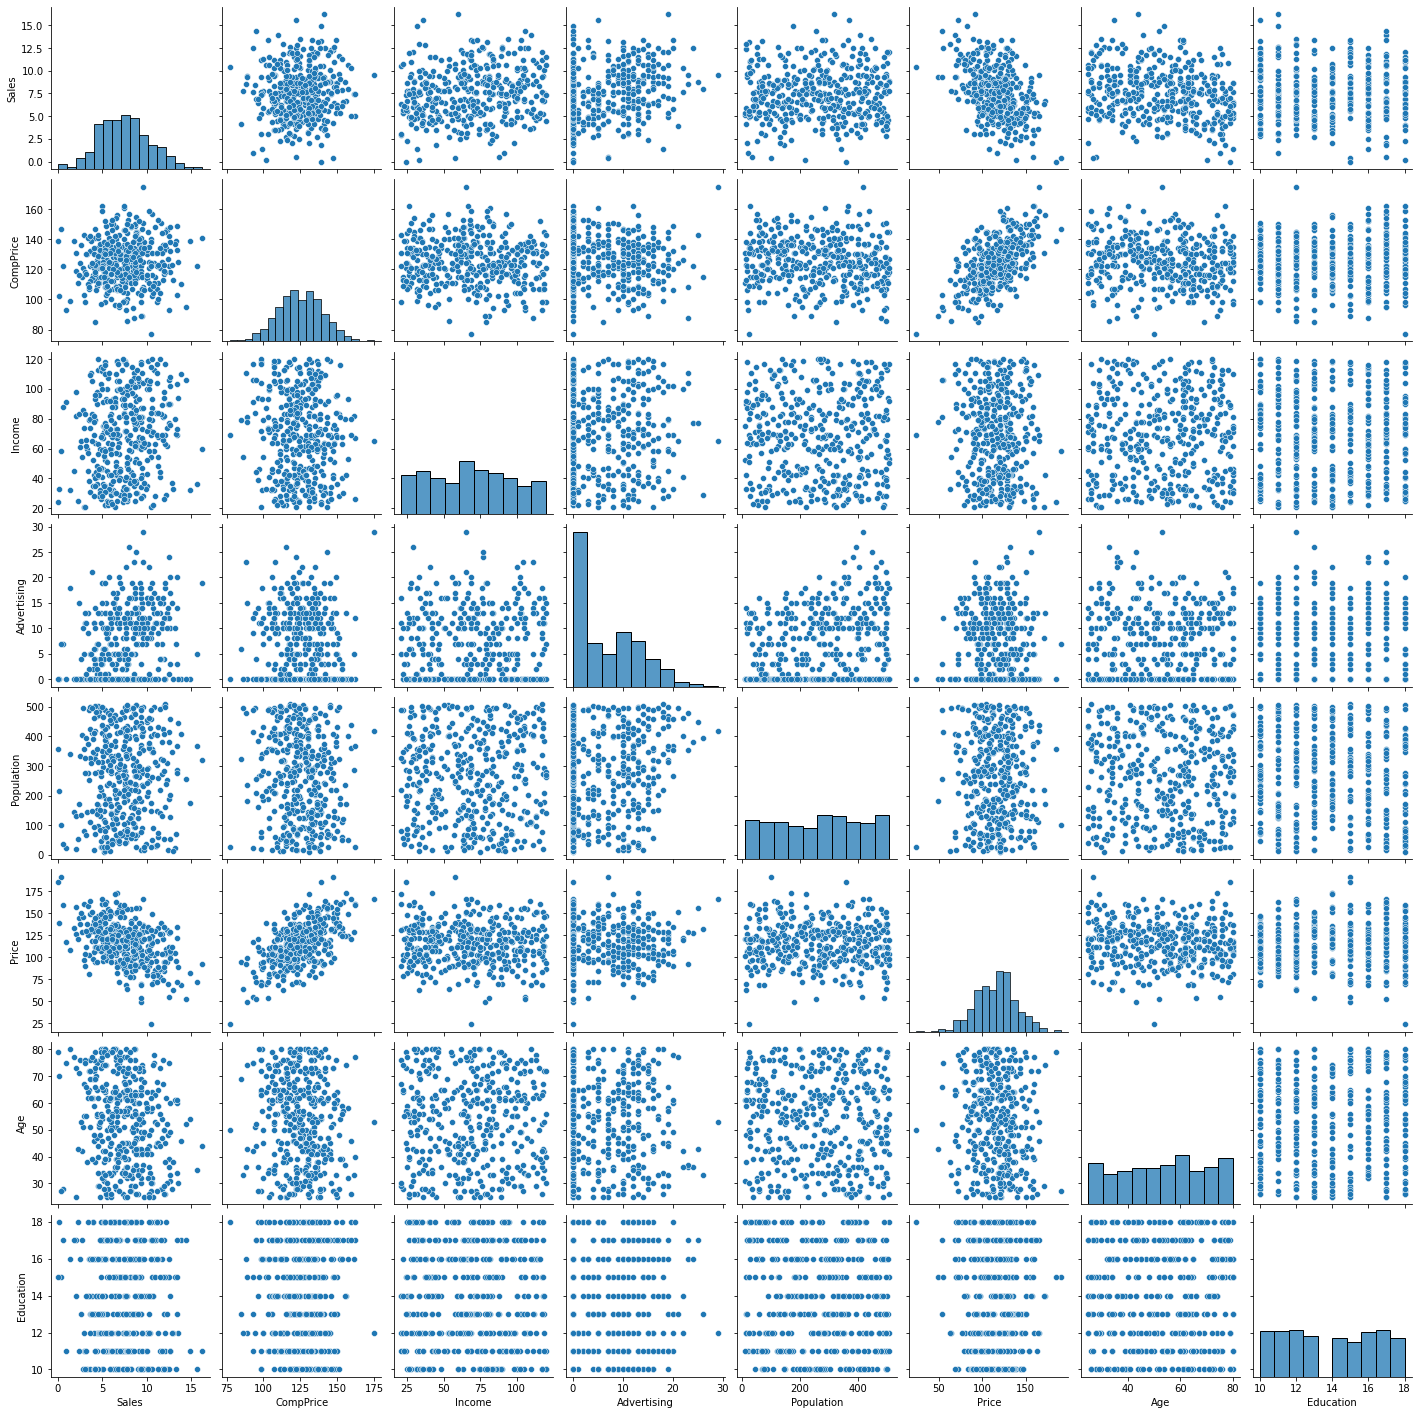

In [7]:
# pairplot
import seaborn as sns
sns.pairplot(data)

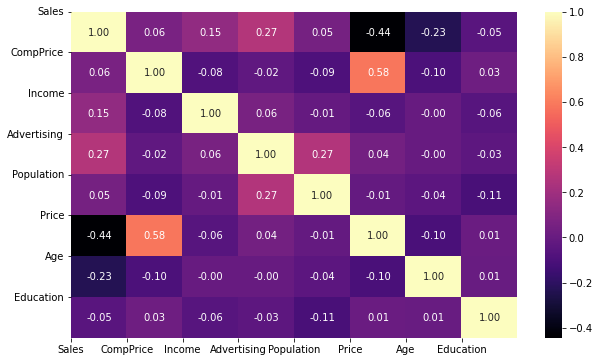

In [8]:
# Correlation analysis for data
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


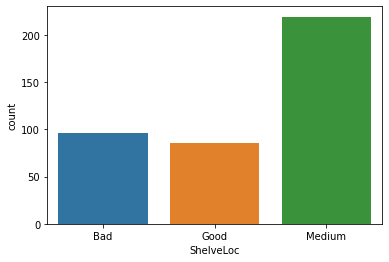

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


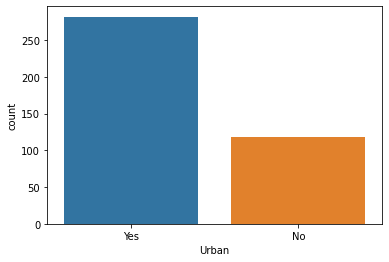

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


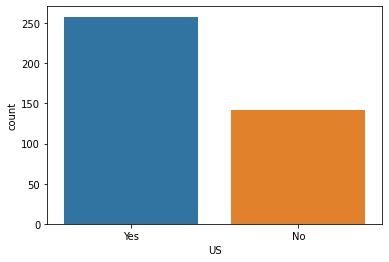

In [9]:
# checking count of categories for categorical columns colums
sns.countplot(data['ShelveLoc'])
plt.show()

sns.countplot(data['Urban'])
plt.show()

sns.countplot(data['US'])
plt.show()

**Applying Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)**

In [10]:
data = pd.get_dummies(data)
data.head()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [11]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
data['Sales'] = pd.cut(x=data['Sales'],bins=[0, 6, 12, 18], labels=['Low','Medium', 'High'], right = False)
data['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [12]:
data['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [13]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,Medium,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,Medium,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,Medium,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,Medium,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,Low,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [14]:
dataset = data.values

In [15]:
# split into input (X) and output (y) variables
X = dataset[:, 1:]
y = dataset[:,0]

In [16]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [17]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [18]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [19]:
scores

array([3.89832180e+00, 8.05201343e+01, 1.44508146e+02, 1.52363180e-01,
       2.49402227e+02, 6.64274764e+01, 1.30633499e+00, 4.16068376e+01,
       6.17243171e+01, 5.14133136e+00, 1.44231440e-01, 6.03521628e-02,
       5.19910473e+00, 2.86152276e+00])

In [20]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'],
      dtype='object')

In [21]:
col_names = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes']

In [22]:
score_df = pd.DataFrame(list(zip(scores, col_names)),
               columns =['Score', 'Feature'])

In [23]:
score_df

,Score,Feature
0,3.898322,CompPrice
1,80.520134,Income
2,144.508146,Advertising
3,0.152363,Population
4,249.402227,Price
5,66.427476,Age
6,1.306335,Education
7,41.606838,ShelveLoc_Bad
8,61.724317,ShelveLoc_Good
9,5.141331,ShelveLoc_Medium


In [24]:
data_model = data[['Sales', 'Price', 'Advertising', 'Income', 'Age', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium']]
data_model.head()

,Sales,Price,Advertising,Income,Age,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,Medium,120,11,73,42,1,0,0
1,Medium,83,16,48,65,0,1,0
2,Medium,80,10,35,59,0,0,1
3,Medium,97,4,100,55,0,0,1
4,Low,128,3,64,38,1,0,0


In [25]:
X = data_model.iloc[:, 1:]
y = data['Sales']

**Splitting data into train and test data**

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(268, 7)
(132, 7)
(268,)
(132,)


#**Random Forest Classification**

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 'auto'
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [38]:
# Train the model on training data
model.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.7539886039886039


**Bagged Decision Trees for Classification**

In [47]:
from sklearn.ensemble import BaggingClassifier

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=42,)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.6947293447293447


#**AdaBoost Classification**

In [49]:
from sklearn.ensemble import AdaBoostClassifier

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model = AdaBoostClassifier(n_estimators=10, random_state=42)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.6642450142450143
